<a href="https://colab.research.google.com/github/ramadhita/tweet-analysis/blob/main/extracting_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install Tweet-preprocessor

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/tweet-analysis"

Meterai_Tempel_6000.jpg  tweet_results.csv


In [4]:
import pandas as pd
import re 
import preprocessor as p
import string
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
import tweepy as tw

consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_key= 'your_access_key'
access_secret = 'your_access_secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth,wait_on_rate_limit=True)


In [7]:
search_words = "Boundaries"      # enter your words
date_since = "2018-11-11"
new_search = search_words + " -filter:retweets"

print(new_search)


Boundaries -filter:retweets


In [20]:
#Extract 1000 tweets
tweets = api.search(q = new_search,count = 1000, lang = "en", tweet_mode="extended")

df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df.head()

,Tweets
0,@emmahn6 @1998ngaitahu @cheomitII @HeatherEHey...
1,@d_notalwys_nice 😡 hate it!!!!! Now I gotta re...
2,The critical conversation for newbie swinging ...
3,Another great article helping $DOGE push bound...
4,you females be so pathetic trying to mess with...


In [21]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
  text  =re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub(r'#','',text) #removeing the '# symbol
  text = re.sub(r'RT[\s]+','',text) #removing RT
  text = re.sub(r'https?:\/\/\S+','',text) #remove hyperlink

  return text
#cleaning text
df['Tweets']=df['Tweets'].apply(cleanTxt)
#Show the cleaned text
df.head()

,Tweets
0,In my limited experience it's an effort to...
1,_notalwys_nice 😡 hate it!!!!! Now I gotta resp...
2,The critical conversation for newbie swinging ...
3,Another great article helping $DOGE push bound...
4,you females be so pathetic trying to mess with...


In [22]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,In my limited experience it's an effort to...,0.142857,-0.071429
1,_notalwys_nice 😡 hate it!!!!! Now I gotta resp...,0.950000,-0.200000
2,The critical conversation for newbie swinging ...,0.800000,0.000000
3,Another great article helping $DOGE push bound...,0.588095,0.091518
4,you females be so pathetic trying to mess with...,0.587500,-0.609375


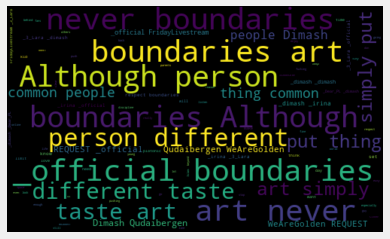

In [23]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation ="bilinear")
plt.axis('off')
plt.show()

In [24]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,In my limited experience it's an effort to...,0.142857,-0.071429,Negative
1,_notalwys_nice 😡 hate it!!!!! Now I gotta resp...,0.950000,-0.200000,Negative
2,The critical conversation for newbie swinging ...,0.800000,0.000000,Neutral
3,Another great article helping $DOGE push bound...,0.588095,0.091518,Positive
4,you females be so pathetic trying to mess with...,0.587500,-0.609375,Negative


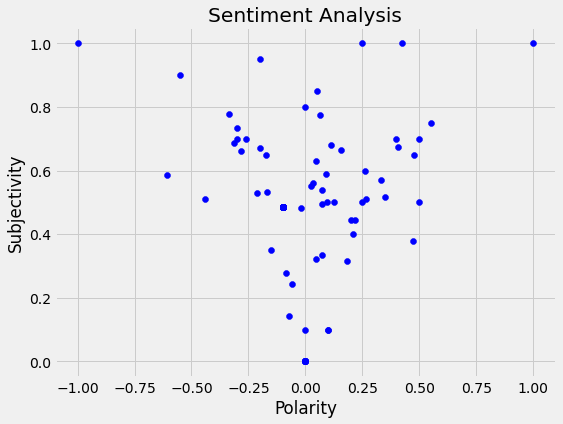

In [25]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
#Get the percentage of the positive tweets
ptweets = df[df.Analysis =='Positive']
ptweets = ptweets['Tweets']

ptweetsr = round((ptweets.shape[0]/df.shape[0])*100,1)
print(ptweetsr)

ptweets.head()

35.0


3     Another great article helping $DOGE push bound...
6     The second day of the Omer, 5781. Discipline w...
8      ( i don’t think this makes you a jerk at all ...
10    The importance of saying "No" gets a lot of li...
11    Okile wabona motho ayetsa nyons fela mara beca...
Name: Tweets, dtype: object

In [27]:
#Get the percentage of the negative tweets
ntweets = df[df.Analysis =='Negative']
ntweets = ntweets['Tweets']

ntweetsr = round((ntweets.shape[0]/df.shape[0])*100,1)
print(ntweetsr)

ntweets.head()

51.0


0         In my limited experience it's an effort to...
1     _notalwys_nice 😡 hate it!!!!! Now I gotta resp...
4     you females be so pathetic trying to mess with...
5     NTA.\n\nThe assumption all women should just a...
12    But holy shit is it exhausting having someone ...
Name: Tweets, dtype: object

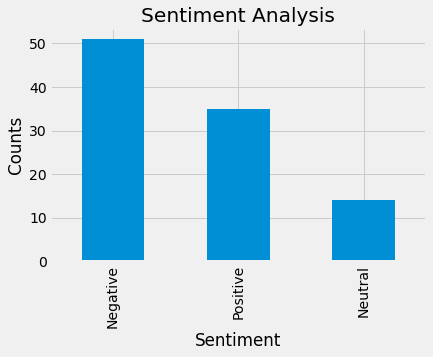

In [28]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()